# 美国2012年总统候选人政治献金数据分析

导入包

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

方便大家操作，将月份和参选人以及所在政党进行定义

In [56]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

读取文件

In [57]:
df=pd.read_csv('./usa_election.txt')
df

c:\users\ause\desktop\python2101\2101\env\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536036,C00500587,P20003281,"Perry, Rick","ANDERSON, MARILEE MRS.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,2500.0,31-AUG-11,NaN,NaN,NaN,SA17A,751678
536037,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678
536038,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678
536039,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678


查看文件样式以及基本信息

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536041 entries, 0 to 536040
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cmte_id            536041 non-null  object 
 1   cand_id            536041 non-null  object 
 2   cand_nm            536041 non-null  object 
 3   contbr_nm          536041 non-null  object 
 4   contbr_city        536026 non-null  object 
 5   contbr_st          536040 non-null  object 
 6   contbr_zip         535973 non-null  object 
 7   contbr_employer    525088 non-null  object 
 8   contbr_occupation  530520 non-null  object 
 9   contb_receipt_amt  536041 non-null  float64
 10  contb_receipt_dt   536041 non-null  object 
 11  receipt_desc       8479 non-null    object 
 12  memo_cd            49718 non-null   object 
 13  memo_text          52740 non-null   object 
 14  form_tp            536041 non-null  object 
 15  file_num           536041 non-null  int64  
dtypes:

In [59]:
df.isnull().any()

cmte_id              False
cand_id              False
cand_nm              False
contbr_nm            False
contbr_city           True
contbr_st             True
contbr_zip            True
contbr_employer       True
contbr_occupation     True
contb_receipt_amt    False
contb_receipt_dt     False
receipt_desc          True
memo_cd               True
memo_text             True
form_tp              False
file_num             False
dtype: bool

【知识点】使用map函数+字典，新建一列各个候选人所在党派party

In [60]:
df['party']=df['cand_nm'].map(parties)
df

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536036,C00500587,P20003281,"Perry, Rick","ANDERSON, MARILEE MRS.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,2500.0,31-AUG-11,NaN,NaN,NaN,SA17A,751678,Republican
536037,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
536038,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
536039,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican


查看单独一行，是否加上了'party'一列

In [61]:
df.iloc[[0]]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


使用np.unique()函数查看colums：party这一列中有哪些元素

In [8]:
df['party'].unique()

array(['Republican', 'Democrat', 'Reform', 'Libertarian'], dtype=object)

使用value_counts()函数，统计party列中各个元素出现次数

In [9]:
df['party'].value_counts()

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: party, dtype: int64

【知识点】使用groupby()函数，查看各个党派收到的政治献金总数contb_receipt_amt

In [10]:
df.groupby('party')[['contb_receipt_amt']].sum()

,contb_receipt_amt
party,
Democrat,8.105758e+07
Libertarian,4.132769e+05
Reform,3.390338e+05
Republican,1.192255e+08


查看具体每天各个党派收到的政治献金总数contb_receipt_amt  
使用groupby([多个分组参数])

In [11]:
df.groupby(by=['party','contb_receipt_dt'])[['contb_receipt_amt']].sum()

contb_receipt_amt
party      contb_receipt_dt                   
Democrat   01-AUG-11                 175281.00
           01-DEC-11                 651532.82
           01-JAN-12                  58098.80
           01-JUL-11                 165961.00
           01-JUN-11                 145459.00
...                                        ...
Republican 31-JAN-12                 869890.41
           31-JUL-11                  12781.02
           31-MAR-11                  62475.00
           31-MAY-11                 301339.80
           31-OCT-11                 734601.83

[1183 rows x 1 columns]

查看日期格式，并将其转换为Pandas的日期格式,通过函数加map方式进行转换

In [12]:
df.dtypes

cmte_id               object
cand_id               object
cand_nm               object
contbr_nm             object
contbr_city           object
contbr_st             object
contbr_zip            object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
receipt_desc          object
memo_cd               object
memo_text             object
form_tp               object
file_num               int64
party                 object
dtype: object

In [16]:
df['contb_receipt_dt']=pd.to_datetime(df['contb_receipt_dt'])

查看是否转换成功

In [14]:
df.dtypes

cmte_id               object
cand_id               object
cand_nm               object
contbr_nm             object
contbr_city           object
contbr_st             object
contbr_zip            object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
receipt_desc          object
memo_cd               object
memo_text             object
form_tp               object
file_num               int64
party                 object
dtype: object

In [17]:
df[['contb_receipt_dt']]

,contb_receipt_dt
0,2011-06-20
1,2011-06-23
2,2011-07-05
3,2011-08-01
4,2011-06-20
...,...
536036,2011-08-31
536037,2011-09-30
536038,2011-09-29
536039,2011-09-30


将时间转换为时间数据类型  
根据时间进行排序

In [15]:
df.sort_values(by='contb_receipt_dt',inplace=True)
df

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
478480,C00496067,P00003608,"Cain, Herman","MAREK, JOHN",WAUKESHA,WI,531899772,INFORMATION REQUESTED,INFORMATION REQUESTED,2400.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475327,C00496067,P00003608,"Cain, Herman","STOLTENBERG, WAYNE",WESTLAKE,TX,762629076,CINCO RESOURCES,CFO,5200.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475328,C00496067,P00003608,"Cain, Herman","TRIBBLE, JAMES",HOUSTON,TX,770795026,NONE,RETIRED,1000.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
478481,C00496067,P00003608,"Cain, Herman","SIDNEY, SCOTT",CEDARBURG,WI,530122317,SELF EMPLOYED,CONTRACTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican
475329,C00496067,P00003608,"Cain, Herman","DAVIS, JEREMY S MR.",HOUSTON,TX,770252267,INTL PETROLEUM ASSOC OF AMERICA,INVESTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116633,C00431445,P80003338,"Obama, Barack","VARELA, ANGEL",LAGUNA NIGUEL,CA,926772115,INFORMATION REQUESTED,INFORMATION REQUESTED,200.0,2012-01-31,NaN,NaN,NaN,SA17A,766535,Democrat
63165,C00431445,P80003338,"Obama, Barack","BRAY, LOIS",GILBERT,AZ,852962703.0,INFORMATION REQUESTED,INFORMATION REQUESTED,100.0,2012-01-31,NaN,NaN,NaN,SA17A,766535,Democrat
116628,C00431445,P80003338,"Obama, Barack","BEST, BONNIE",N HOLLYWOOD,CA,916023069,SELF-EMPLOYED,BUSINESS OWNER,250.0,2012-01-31,NaN,NaN,NaN,SA17A,766535,Democrat
452120,C00496034,P20002721,"Santorum, Rick","COEN, IRENE M. MS.",EAGLE,ID,83616,RETIRED,ATTORNEY - NURSE,200.0,2012-01-31,NaN,NaN,NaN,SA17A,767129,Republican


得到转换后的，每天各政党所收政治献金数目。  

考察知识点：groupby（多个字段）

In [38]:
money=df.groupby(by=['party','contb_receipt_dt'])[['contb_receipt_amt']].sum()
money

contb_receipt_amt
party      contb_receipt_dt                   
Democrat   2011-04-04                640235.12
           2011-04-05                307641.00
           2011-04-06                247542.59
           2011-04-07                252336.00
           2011-04-08                295452.00
...                                        ...
Republican 2012-01-27                368441.82
           2012-01-28                 82775.80
           2012-01-29                 75220.02
           2012-01-30                255204.80
           2012-01-31                869890.41

[1183 rows x 1 columns]

【知识点】使用unstack()将上面所得数据中的party从一级索引变成列索引,unstack('party')

In [45]:
mo_unstack=money.unstack('party')
mo_unstack

contb_receipt_amt                                
party                     Democrat Libertarian   Reform Republican
contb_receipt_dt                                                  
2011-01-01                     NaN         NaN      NaN    8600.00
2011-01-03                     NaN         NaN      NaN    4800.00
2011-01-04                     NaN         NaN      NaN    5000.00
2011-01-12                     NaN         NaN      NaN    4150.00
2011-01-13                     NaN         NaN      NaN    4000.00
...                            ...         ...      ...        ...
2012-01-27               305785.47         NaN  3176.37  368441.82
2012-01-28               235492.85         NaN   175.00   82775.80
2012-01-29                93177.00         NaN   200.00   75220.02
2012-01-30               435921.72         NaN   130.00  255204.80
2012-01-31              1418410.31         NaN   150.00  869890.41

[376 rows x 4 columns]

使用上面获取的数据  
画出各党派累计政治献金,cumsum()累加函数

<AxesSubplot:xlabel='contb_receipt_dt'>

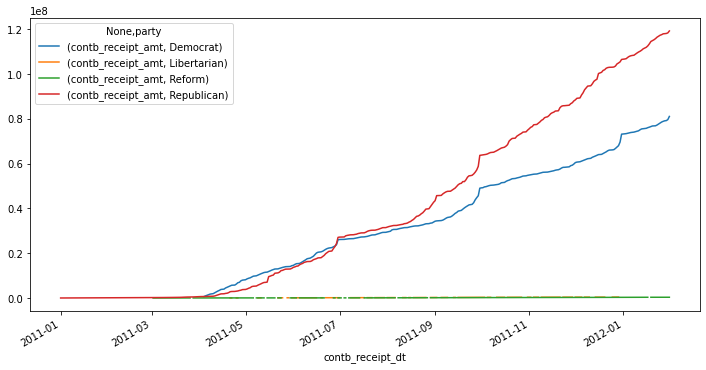

In [51]:
mo_unstack.loc[:,['contb_receipt_amt']].cumsum().plot(figsize=(12,6))

把时间作为列，党派作为行来观察,unstack('contb_receipt')

In [49]:
mo_time=money.unstack('contb_receipt_dt')
mo_time

contb_receipt_amt                                   \
contb_receipt_dt        2011-01-01 2011-01-03 2011-01-04 2011-01-12   
party                                                                 
Democrat                       NaN        NaN        NaN        NaN   
Libertarian                    NaN        NaN        NaN        NaN   
Reform                         NaN        NaN        NaN        NaN   
Republican                  8600.0     4800.0     5000.0     4150.0   

                                                                         \
contb_receipt_dt 2011-01-13 2011-01-14 2011-01-15 2011-01-16 2011-01-17   
party                                                                     
Democrat                NaN        NaN        NaN        NaN        NaN   
Libertarian             NaN        NaN        NaN        NaN        NaN   
Reform                  NaN        NaN        NaN        NaN        NaN   
Republican           4000.0     6000.0      500.0      750.0      500.0   

                             ...                                              \
contb_receipt_dt 2011-01-18  ... 2012-01-22 2012-01-23 2012-01-24 2012-01-25   
party                        ...                                               
Democrat                NaN  ...   67194.23  337307.07  458909.23  438949.32   
Libertarian             NaN  ...        NaN        NaN        NaN        NaN   
Reform                  NaN  ...     450.00     225.00     500.00     282.00   
Republican           4800.0  ...  507168.71  645477.15  462233.66  416931.39   

                                                                         \
contb_receipt_dt 2012-01-26 2012-01-27 2012-01-28 2012-01-29 2012-01-30   
party                                                                     
Democrat          450268.94  305785.47  235492.85   93177.00  435921.72   
Libertarian             NaN        NaN        NaN        NaN        NaN   
Reform                25.00    3176.37     175.00     200.00     130.00   
Republican        256406.86  368441.82   82775.80   75220.02  255204.80   

                              
contb_receipt_dt  2012-01-31  
party                         
Democrat          1418410.31  
Libertarian              NaN  
Reform                150.00  
Republican         869890.41  

[4 rows x 376 columns]

使用stack()把party变成二级行索引,注意所有的值都不能为nan，需要填充为0

In [52]:
mo_party=mo.stack()
mo_party

contb_receipt_amt
contb_receipt_dt party                        
2011-01-01       Republican            8600.00
2011-01-03       Republican            4800.00
2011-01-04       Republican            5000.00
2011-01-12       Republican            4150.00
2011-01-13       Republican            4000.00
...                                        ...
2012-01-30       Reform                 130.00
                 Republican          255204.80
2012-01-31       Democrat           1418410.31
                 Reform                 150.00
                 Republican          869890.41

[1183 rows x 1 columns]

查看候选人姓名cand_nm和政治献金捐献者职业contbr_occupation，以及捐献情况。能看出各个候选人主要的支持者分布情况  
练习：groupy，sum()求和

In [29]:
df.groupby(['cand_nm','contbr_occupation','contbr_city'])[['contb_receipt_amt']].sum()

contb_receipt_amt
cand_nm            contbr_occupation              contbr_city                     
Bachmann, Michelle 100% DISABLED VETERAN          REDDING                  1869.50
                   100% DISABLED VIETNAM VETERAN  COLUMBUS                  236.25
                   A/C AND HEAT                   CYPRESS                   250.00
                   ACADEMIC EMPLOYMENT SPECIALIST WARRENSBURG                25.00
                   ACCOUNT                        CORAL GABLES               50.00
...                                                                            ...
Santorum, Rick     WRITER EDITOR                  GOLDEN                    250.00
                   WRITER/ACCOUNT EXEC            MANASSAS                  500.00
                   WRITER/JOURNALIST              JOLIET                    250.00
                   WRITER/LAWYER                  BASKING RIDGE             300.00
                   YOUTH MINISTER                 SWARTHMORE                250.00

[160068 rows x 1 columns]

In [46]:
df.head(5)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
478480,C00496067,P00003608,"Cain, Herman","MAREK, JOHN",WAUKESHA,WI,531899772,INFORMATION REQUESTED,INFORMATION REQUESTED,2400.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475327,C00496067,P00003608,"Cain, Herman","STOLTENBERG, WAYNE",WESTLAKE,TX,762629076,CINCO RESOURCES,CFO,5200.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475328,C00496067,P00003608,"Cain, Herman","TRIBBLE, JAMES",HOUSTON,TX,770795026,NONE,RETIRED,1000.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
478481,C00496067,P00003608,"Cain, Herman","SIDNEY, SCOTT",CEDARBURG,WI,530122317,SELF EMPLOYED,CONTRACTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican
475329,C00496067,P00003608,"Cain, Herman","DAVIS, JEREMY S MR.",HOUSTON,TX,770252267,INTL PETROLEUM ASSOC OF AMERICA,INVESTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican


查看老兵主要支持谁：DISABLED VETERAN  
考察Series索引

In [57]:
dis=df.query('contbr_occupation == "DISABLED VETERAN"')
dis

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
210809,C00431445,P80003338,"Obama, Barack","DEKLE, CHARLES R.",UPPER MARLBORO,MD,207748600,RETIRED,DISABLED VETERAN,160.00,2011-04-27,NaN,X,BEST EFFORTS UPDATE,SA17A,763233,Democrat
396211,C00495820,P80000748,"Paul, Ron","THORNELL, GARY ENOS MR.",BENTON,KY,420256409,NONE,DISABLED VETERAN,201.20,2011-06-05,NaN,NaN,NaN,SA17A,762896,Republican
464508,C00496067,P00003608,"Cain, Herman","ANDERSON, JOSEPH",GROVETOWN,GA,308134105,NONE,DISABLED VETERAN,100.00,2011-06-18,NaN,NaN,NaN,SA17A,755790,Republican
210810,C00431445,P80003338,"Obama, Barack","DEKLE, CHARLES R.",UPPER MARLBORO,MD,207748600,RETIRED,DISABLED VETERAN,160.00,2011-06-23,NaN,X,BEST EFFORTS UPDATE,SA17A,763233,Democrat
185264,C00431445,P80003338,"Obama, Barack","BAUER, JOSEPH",PROSPECT,KY,40059.0,NOT EMPLOYED,DISABLED VETERAN,100.00,2011-07-08,NaN,NaN,NaN,SA17A,756218,Democrat
185140,C00431445,P80003338,"Obama, Barack","BAUER, JOSEPH",PROSPECT,KY,40059.0,NOT EMPLOYED,DISABLED VETERAN,85.00,2011-07-08,NaN,NaN,NaN,SA17A,756218,Democrat
420332,C00495820,P80000748,"Paul, Ron","CRAYCRAFT, SETH MR.",MIDDLETOWN,OH,450444916,DEPT OF VETERANS AFFAIRS,DISABLED VETERAN,20.12,2011-07-19,NaN,NaN,NaN,SA17A,763173,Republican
235014,C00431445,P80003338,"Obama, Barack","RORIE, FOREST",WADESBORO,NC,281707443,INFORMATION REQUESTED,DISABLED VETERAN,50.00,2011-07-22,NaN,NaN,NaN,SA17A,756218,Democrat
260154,C00431445,P80003338,"Obama, Barack","NOLAN, DIANA",SPRAKERS,NY,12166,DISABLED VETERAN,DISABLED VETERAN,50.00,2011-07-28,NaN,NaN,NaN,SA17A,756218,Democrat
184211,C00431445,P80003338,"Obama, Barack","BRYANT, J.L.",TOPEKA,KS,666121668.0,RET ARMY,DISABLED VETERAN,100.00,2011-08-04,NaN,NaN,NaN,SA17A,756218,Democrat


In [64]:
df.groupby('cand_nm')[['contbr_occupation']].count()

,contbr_occupation
cand_nm,
"Cain, Herman",3
"Obama, Barack",32
"Paul, Ron",22
"Santorum, Rick",3


把索引变成列,Series.reset_index()

找出各个候选人的捐赠者中，捐赠金额最大的人的职业以及捐献额  

通过query("查询条件来查找捐献人职业")

In [75]:
gro=df.groupby(['cand_nm','contbr_occupation','contbr_city'])[['contb_receipt_amt']].sum().sort_values(by=['cand_nm','contb_receipt_amt'])
gro

contb_receipt_amt
cand_nm            contbr_occupation                    contbr_city                      
Bachmann, Michelle INFORMATION REQUESTED                COUNCIL BLUFFS            -111.11
                                                        REISTERSTOWN              -100.00
                                                        TAYLORS                    -50.00
                   MFG. REP                             MOORESTOWN                 -50.00
                   HOUSEWIFE                            ACWORTH                    -35.00
...                                                                                   ...
Santorum, Rick     EXECUTIVE                            COLUMBIA                  8750.00
                   RETIRED                              SHREVEPORT                9000.00
                   HOMEMAKER                            PITTSBURGH               10600.00
                   INFORMATION REQUESTED (BEST EFFORTS) KINGS POINT              11500.00
                   RETIRED                              PITTSBURGH               11600.00

[160068 rows x 1 columns]

In [77]:
gro.groupby(['cand_nm','contbr_occupation'])[['contb_receipt_amt']].max()

contb_receipt_amt
cand_nm            contbr_occupation                                
Bachmann, Michelle 100% DISABLED VETERAN                     1869.50
                   100% DISABLED VIETNAM VETERAN              236.25
                   A/C AND HEAT                               250.00
                   ACADEMIC EMPLOYMENT SPECIALIST              25.00
                   ACCOUNT                                     50.00
...                                                              ...
Santorum, Rick     WRITER EDITOR                              250.00
                   WRITER/ACCOUNT EXEC                        500.00
                   WRITER/JOURNALIST                          250.00
                   WRITER/LAWYER                              300.00
                   YOUTH MINISTER                             250.00

[40160 rows x 1 columns]